In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import wandb
from benchmark import MixedBenchmark
from utils import get_wandb_run_dfs, calculate_hypervolume
import matplotlib.pyplot as plt
import numpy as np

/Users/Kobi/Documents/Research/phd_code/bo_mixed/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
api = wandb.Api()
wandb_settings = {"wandb_entity": "ceb-sre", "wandb_project": "bo_mixed"}

In [5]:
configs = [{"config.experiment.noise_level": 0.0}, {"config.experiment.noise_level": 5.0}]
all_dfs = []
for config in configs:
    dfs = get_wandb_run_dfs(
        api, 
        **wandb_settings,
        extra_filters=config,
        commit="e9c4b09f958c25d7daec36260c5d01322d145555"
    )
    all_dfs.append(dfs)

wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downlo

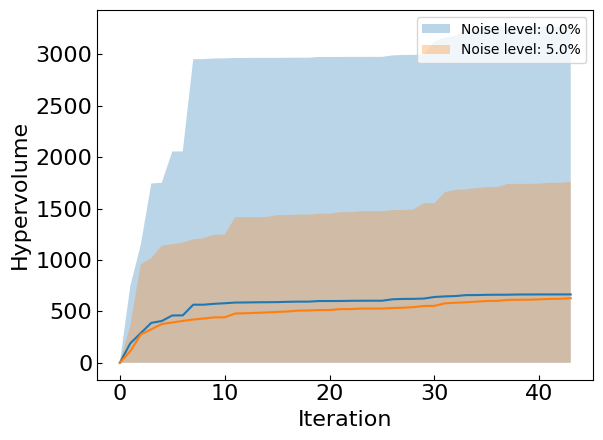

In [11]:
fig, ax = plt.subplots(1)
exp = MixedBenchmark()
for noise_level, dfs in zip([0.0, 5.0], all_dfs):

    hvs = np.array([
        calculate_hypervolume(df, exp._domain) 
        for df in dfs
    ])

    hvs_mean = hvs.mean(axis=0)
    hvs_std = hvs.std(axis=0)
    ax.plot(hvs_mean)
    lower = hvs_mean -1.96*hvs_std
    lower = np.where(lower < 0, 0, lower)
    ax.fill_between(
        np.arange(len(hvs_mean)), 
        lower,
        hvs_mean + 1.96*hvs_std,
        alpha=0.3,
        label=f"Noise level: {noise_level}%"
    )
axis_fontsize= 16
ax.set_ylabel("Hypervolume", fontsize=axis_fontsize)
ax.set_xlabel("Iteration", fontsize=axis_fontsize)
fig.savefig("hypervolume.png")
ax.legend()
ax.tick_params(direction="in", labelsize=axis_fontsize)
fig.savefig("results/hypervolume_plot.png", dpi=300)